# EDA for Spodity Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
import matplotlib.pylab as plt
import seaborn as sns

df = pd.read_csv("G:/My Drive/Documents 1/MScA 31008/Final Project/Peter Class files/tracks_v3.csv")

 ## Overallview of Data

In [2]:
df.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,duration_ms,...,artist_chart_months,artist_chart_months_recently,artist_releases_recently,genre,label_name,major_label,label_matched,chart_status,award_status,selected_genre
0,10iesoGb4mCYTcur1QfdO9,JCVD,Rien 100 Rien,2GLuHlc49dJKY8yzxUZb8p,Jul,"[""3IW7ScrzXmPvZhB27hmfgy""]",2,1,True,194266,...,0,0,33,rap marseille,D’Or et de Platine,0.0,1.0,0,0,rap
1,0DlHQxrVijRqVUfuS6PKaY,Deixa de Onda (Porra Nenhuma),Deixa de Onda (Porra Nenhuma),1fjkJADMiiZWMDusZSMNix,"DENNIS, Xamã, LUDMILLA","[""6xlRSRMLgZbsSNd0BMobwy"", ""5YwzDz4RJfTiMHS4td...",1,1,True,184999,...,0,0,118,funk das antigas,Sony Music,1.0,1.0,0,0,trap
2,2QtM6ZVLx13TBOO1iwmXYy,Cubra Libre Bar - Café Buddha del Mar Mix,Hotel Paradise del Mar (Chill Out Lounge Café ...,3wsWiiFbTF3TpC41yStCTL,Mark Bareilles,"[""22PKRoZlEMpKexRXSLStVP""]",12,1,False,332068,...,0,0,0,other,NaN,NaN,NaN,0,0,other
3,27hFQQS3cVUmIK3ser5bpu,More Than Gravity,More Than Gravity,4kcSIHj40oMyfHgMG6XAmO,Colin & Caroline,"[""2Y4125mDrgQyPD7dt76Rtm""]",1,1,False,266078,...,0,0,0,acoustic cover,NaN,NaN,NaN,0,0,pop
4,1YcqYmviKagJ68DOmjSWQW,Tojo Tojo,Tojo Tojo,58NV8EvCFPHWwi7HHdVqSy,"Nik Tendo, Karlo","[""28oxY7ZfDt1BJFf8FVfpEh"", ""6gvVFtkTV4OCyQSCzG...",1,1,True,197010,...,0,0,68,czsk hip hop,W.C. Records,0.0,1.0,0,0,hip hop


In [3]:
df.describe()

,track_number,disc_number,duration_ms,year,popularity,audio_features,danceability,energy,key,loudness,...,artist_nominations,artist_wins,artist_releases,artist_chart_months,artist_chart_months_recently,artist_releases_recently,major_label,label_matched,chart_status,award_status
count,14967.000000,14967.000000,1.496700e+04,14967.000000,14967.000000,14967.000000,14965.000000,14965.000000,14965.000000,14965.000000,...,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,14967.000000,6363.000000,6363.0,14967.000000,14967.000000
mean,4.277410,1.010891,2.214180e+05,2014.754126,45.380704,0.999866,0.648840,0.652521,5.310992,-6.596083,...,0.412307,0.139841,17.268658,7.682167,3.236854,10.369279,0.689926,1.0,0.330661,0.034810
std,5.237422,0.139016,5.872728e+04,5.443802,28.020607,0.011559,0.152082,0.186772,3.614923,3.070745,...,1.435007,0.662482,22.966667,19.773718,8.263523,15.886941,0.462560,0.0,0.668718,0.205312
min,1.000000,1.000000,3.056000e+03,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,1.000000,1.000000,1.888905e+05,2012.000000,23.000000,1.000000,0.552000,0.536000,2.000000,-7.810000,...,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000
50%,2.000000,1.000000,2.145060e+05,2017.000000,54.000000,1.000000,0.665000,0.675000,6.000000,-6.038000,...,0.000000,0.000000,9.000000,0.000000,0.000000,5.000000,1.000000,1.0,0.000000,0.000000
75%,6.000000,1.000000,2.443565e+05,2019.000000,68.000000,1.000000,0.759000,0.794000,8.000000,-4.700000,...,0.000000,0.000000,24.000000,3.000000,1.000000,13.000000,1.000000,1.0,0.000000,0.000000
max,106.000000,10.000000,1.465480e+06,2022.000000,96.000000,1.000000,0.983000,0.999000,11.000000,1.509000,...,26.000000,20.000000,334.000000,193.000000,87.000000,282.000000,1.000000,1.0,2.000000,2.000000


In [4]:
print(df.dtypes)

id                 object
name               object
album              object
album_id           object
artists            object
                   ...   
major_label       float64
label_matched     float64
chart_status        int64
award_status        int64
selected_genre     object
Length: 70, dtype: object


In [5]:
df.shape

(14967, 70)

### Breakdown between both Songs

In [6]:
df_Song_Description = df[["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","time_signature","track_chart_indicativerevenue"]]
# df_Song_Description = preprocessing.normalize(df_Song_Description)
df_Song_Description.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_chart_indicativerevenue
0,0.847,0.830,7.0,-5.873,0.0,0.0340,0.479,0.000003,0.068,0.895,130.050,4.0,0.0
1,0.815,0.690,9.0,-4.622,1.0,0.0469,0.290,0.000000,0.312,0.654,135.036,4.0,0.0
2,0.607,0.359,9.0,-13.140,0.0,0.0392,0.823,0.912000,0.111,0.450,79.988,4.0,0.0
3,0.620,0.468,4.0,-9.648,1.0,0.0268,0.715,0.000039,0.106,0.217,110.969,4.0,0.0
4,0.654,0.739,2.0,-6.595,1.0,0.4650,0.186,0.000000,0.109,0.732,147.586,4.0,0.0


### Here we go into a better view of the metadata from the sub datasets

In [7]:
df_Song_Description.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_chart_indicativerevenue
count,14965.000000,14965.000000,14965.000000,14965.000000,14965.000000,14965.000000,14965.000000,14965.000000,14965.000000,14965.000000,14965.000000,14965.000000,14967.000000
mean,0.648840,0.652521,5.310992,-6.596083,0.595857,0.106494,0.241840,0.039014,0.179689,0.505407,121.619092,3.958904,1122.223930
std,0.152082,0.186772,3.614923,3.070745,0.490742,0.104965,0.260172,0.159843,0.142303,0.230656,29.228437,0.296749,3146.513452
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.552000,0.536000,2.000000,-7.810000,0.000000,0.038300,0.033900,0.000000,0.094400,0.326000,98.003000,4.000000,0.000000
50%,0.665000,0.675000,6.000000,-6.038000,1.000000,0.059400,0.141000,0.000000,0.123000,0.506000,120.048000,4.000000,0.000000
75%,0.759000,0.794000,8.000000,-4.700000,1.000000,0.133000,0.374000,0.000125,0.221000,0.684000,140.006000,4.000000,0.000000
max,0.983000,0.999000,11.000000,1.509000,1.000000,0.954000,0.996000,0.993000,0.986000,0.982000,230.186000,5.000000,54179.658000


In [8]:
df_Song_Description.dtypes

danceability                     float64
energy                           float64
key                              float64
loudness                         float64
mode                             float64
speechiness                      float64
acousticness                     float64
instrumentalness                 float64
liveness                         float64
valence                          float64
tempo                            float64
time_signature                   float64
track_chart_indicativerevenue    float64
dtype: object

In [9]:
df_Song_Description.shape

(14967, 13)

### Graphs explaining the relationship with the data subsets and missing values/ outliers

In [10]:
corr_matrix_Songs=df_Song_Description.corr()


<AxesSubplot:>

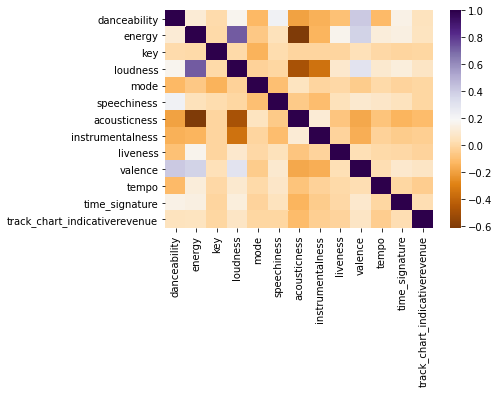

In [11]:
sns.heatmap(corr_matrix_Songs, cmap='PuOr')

In [12]:
# High correlation between 3 attributes, loudness & enegergy, acusticness & Energy, acousticness and & loudness

<AxesSubplot:xlabel='loudness', ylabel='energy'>

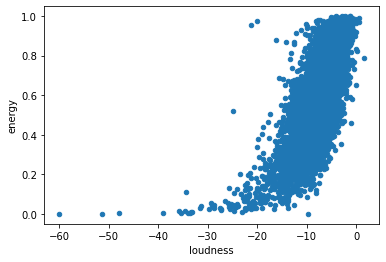

In [13]:
df.plot.scatter(x='loudness', y='energy', marker='o')

<AxesSubplot:xlabel='acousticness', ylabel='energy'>

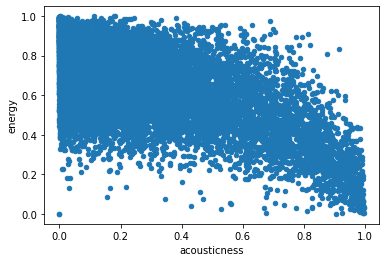

In [14]:
df.plot.scatter(x='acousticness', y='energy', marker='o')

<AxesSubplot:xlabel='loudness', ylabel='acousticness'>

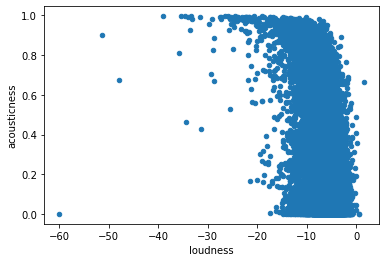

In [15]:
df.plot.scatter(x='loudness', y='acousticness', marker='o')

<AxesSubplot:xlabel='track_chart_indicativerevenue', ylabel='Count'>

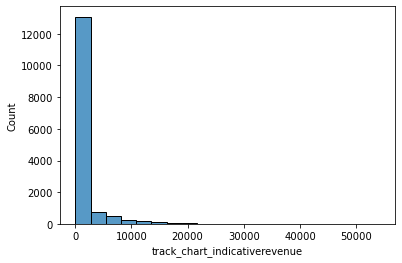

In [16]:
sns.histplot(data= df, x= df["track_chart_indicativerevenue"], bins = 20)

In [17]:
# Understanding better the distribution of # from features in graphs

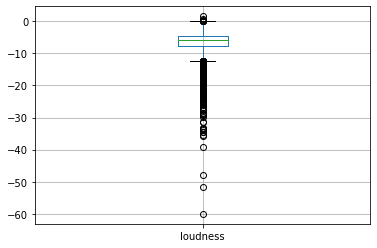

In [18]:
boxplot = df_Song_Description.boxplot(column=["loudness"])

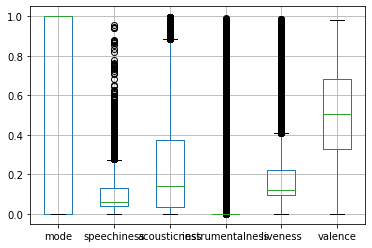

In [19]:
boxplot = df_Song_Description.boxplot(column=["mode","speechiness","acousticness","instrumentalness","liveness","valence"])

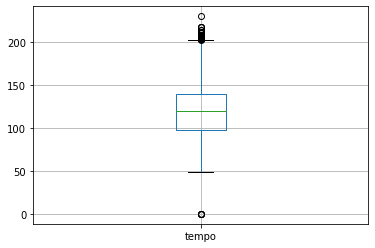

In [20]:
boxplot = df_Song_Description.boxplot(column=["tempo"])

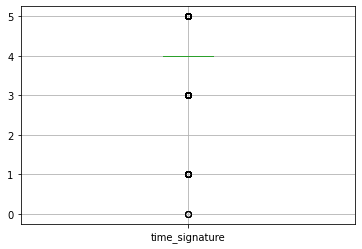

In [21]:
boxplot = df_Song_Description.boxplot(column=["time_signature"])